<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Classification non supervisée avec <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> 

**Résumé**: Illustration des algorithmes de [classification non supervisée]() de `Scikit-learn` sur des données "jouet" : réallocation dynamique ($k$-means), DBSCAN, mélange gaussien.

Tutoriel adapté de: https://github.com/ageron/handson-ml/blob/master/08_dimensionality_reduction.ipynb

*Machine Learning avec Scikit-Learn*, Mise en oeuvre et cas concrets, par Aurélien Géron.

## 1 Introduction
### 1.1 Objectif
Ce tutoriel permet d'illustrer sur des données simulées ou "jouet" les principales fonctions de classification non supervisées présentes dans la librairie `Scikit-learn`. L'algorithme $k$-means y est particulièrement développé ainsi que différentes versions de DBSCAN et les modèles de mélange gaussien. En revanche, la classification ascendante hiérarchique est à rechercher dans la librairie `scipy`. L'usage de cet algorithme est illustré dans un autre tutoriel.
 
### 1.2  Environnement pour python 3 ou 2

In [4]:
import numpy as np
# initialisation du générateur de nombres aléatoires
np.random.seed(42)
# Graphiques
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# Ignorer les warnings inutiles (cf. SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## 2 *K-means*
Cet algorithme et quelques unes de ses variantes sont testées sur des données simulées.

### 2.1 Génération des données

In [5]:
from sklearn.datasets import make_blobs

In [6]:
# Définition des centres
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
# Définition des dispersions
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
# Générations des *blobs*
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

Représentation graphique.

In [7]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

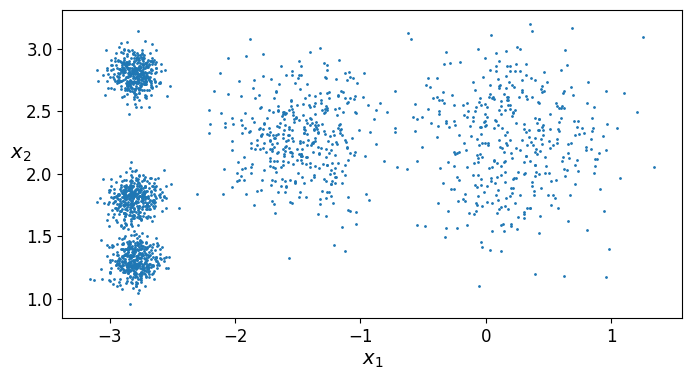

In [8]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### 2.1 Exécution de *K-means*
Le nombre de classes est supposé *a priori* connu. Ce choix est discuté plus loin.

In [9]:
from sklearn.cluster import KMeans

In [10]:
k = 5
# Choix des options
kmeans = KMeans(n_clusters=k, random_state=42)
# Exécution de l'algorithme
y_pred = kmeans.fit_predict(X)

In [11]:
# affichage des classes
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [12]:
# qui sont aussi dans la variables `y_pred`
y_pred

array([4, 0, 1, ..., 2, 1, 0])

La fonction `fit_predict` calcule aussi l'affectation à la classe dont le barycentre est le plus proche pour de nouvelles observations.

In [13]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

La fonction `transform` calcule elle les distances aux barycentres plutôt que l'affectation.

In [14]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

Affichage des barycentres des classes

In [15]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

### 4.2 Frontières des classes
Le tracé des frontières des classes produit un diagramme de Voronoi.

In [25]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=0.5, linewidths=10,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=0.5, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

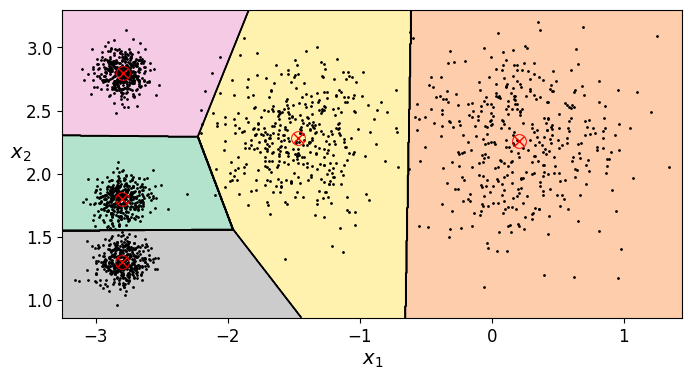

In [26]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

**Q** Sur quelle critère le clustering est-il obtenu ? Quels sont ses défauts ?


--> Kmeans tout simplement ? Défaults : choix de k manuel; frontieres de dùecision lineaires et qui ne prennent pas en compte la variance de chaque classe

### 4.3 Exécution multiple
Comme la convergence de *k-means* est locale, la variabilité des classes obtenues peut être évaluée en considérant plusieurs exécutions de l'algorithme à partir d'initialisation aléatoires différentes. 

In [27]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Chaque exécution est limitée à une seule initilisation.

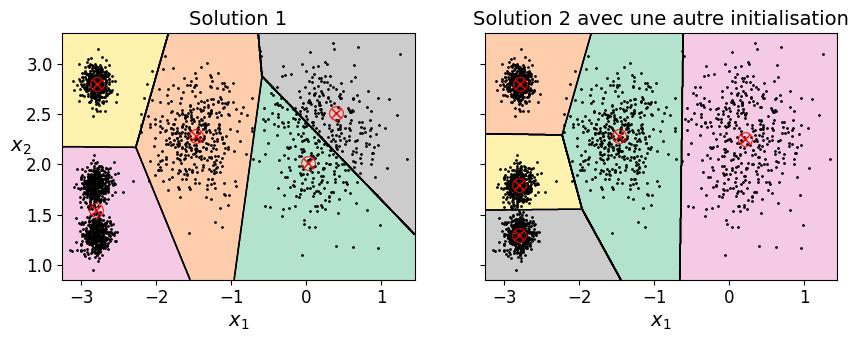

In [30]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd", random_state=12)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 avec une autre initialisation")
plt.show()

L'évaluation de l'inertie (intra-classe) du nuage permet de comparer la qualité de ces classifications.

In [31]:
kmeans.inertia_

211.5985372581684

Inertie qui est la somme des carrés des distances entre chaque observation et le barycentre de sa classe.

In [32]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816805

In [33]:
kmeans.score(X)

-211.5985372581684

Alors que le `score()` est l'opposé de l'inertie.

In [34]:
kmeans_rnd_init1.inertia_

223.2910857281904

In [35]:
kmeans_rnd_init2.inertia_

211.5985372581684

**Q** Laquelle entre les deux exécutions (init1 et init2) est-elle préférable ? Pourquoi ?

--> La seconde semble donner des meilleurs résultats visuellement. C'est aussi celle dont l'inertie est la plus faible.

Exécution avec 10 initialisations

In [42]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10, algorithm="lloyd", random_state=11)
kmeans_rnd_10_inits.fit(X)
kmeans_rnd_10_inits.score(X)

-211.5985372581684

In [43]:
kmeans_rnd_2_inits = KMeans(n_clusters=5, init="random", n_init=2, algorithm="lloyd", random_state=11)
kmeans_rnd_2_inits.fit(X)
kmeans_rnd_2_inits.score(X)

-219.4538679894151

**Q** A quoi sert le paramètre n_init ? Quel résultat retrouve t-on si n_init = 2 ? Pourquoi ? Au final quel réglage est-il préférable de faire ? 

--> Le paramètre n_init contrôle le nombre d'exécutions de l'algorithme. On garde le meilleur résultat au sens de la minimisation de l'inertie parmis les n_init exécutions. n_init = 10 donne donc sans surprise un résultat meilleur que n_init = 2 . C'est cependant plus long en calcul.

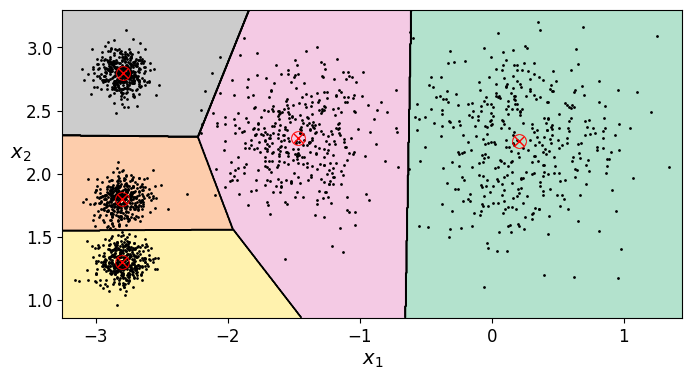

In [44]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### 4.4 *K-means++*
[Arthur and Vassilvitskii (2006)](https://goo.gl/eNUPw6) ont proposé une autre initialisation des barycentres de l'algorithme:
* Choisir un centre $c_1$ aléatoirement, uniformément dans les données, 
* Répéter $K-1$ fois: choisir un autre centre $c_k$, parmi des les données: $\mathbf{x}_i$ avec la probabilité $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ où $D(\mathbf{x}_i)$ est la distance entre $\mathbf{x}_i$ et le centre le plus proche déjà choisi. Cette probabilité assure que le nouveau centre est éloigné des autres centres précédemment choisis.

En principe ce procédé permet de réduire le nombre `n_init` d'initialisations et donc de compenser le temps pris par cette procédure d'initialisation. 

Remarque: cette initialisation est obtenue par `init="k-means++"` qui est prise par défaut. Une "initialisation optimale" conduit à des résultats identiques.

In [47]:
help(KMeans())

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence, and is
 |      theoretically proven to be :math:`\mathcal{O}(\log k)`-optimal.
 |      See the description of `n_init` for mo

In [48]:
KMeansDefault = KMeans(n_clusters = 5, random_state = 42)
KMeansDefault.fit(X)
KMeansDefault.inertia_

211.5985372581684

**Q** Que fait le code ci-dessous ? Essayer de choisir à la main une meilleure initialisation. 
Comparer avec le choix par défaut de KMeans.

--> Il s'agit d'une initialisation manuelle mal choisie. On commence avec tous les barycentres en (0,0). Nous proposons une meilleure initialisation en dessous.

In [49]:
good_init = np.array([[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

258.6436982676501

In [50]:
good_init = np.array([[-3, 1], [-3, 2], [-3, 3], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### 4.5 Accélération de *K-means*
[Elkan (2003)](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) a proposé une accélération de l'algorithme en exploitant l'inégalité triangulaire pour économiser des calculs de distance : pour trois points A, B et C, la distance AC ≤ AB + BC. Cela permet de garder en mémoire des bornes inféreures et supérieures des distances entre observations et barycentres. L'option `algorithm="elkan"` exécute ce procédé par défaut mais seulement pour des données denses. Pour des données creuses (*sparse*) l'option `full` est utilisée par défaut.

In [51]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

150 ms ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [52]:
%timeit -n 50 KMeans(algorithm="lloyd").fit(X)

93.5 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### 4.6 Optimiser le nombre de classes
Un aute nombre de classes que celui initial par construction perturbe l'agorithme.

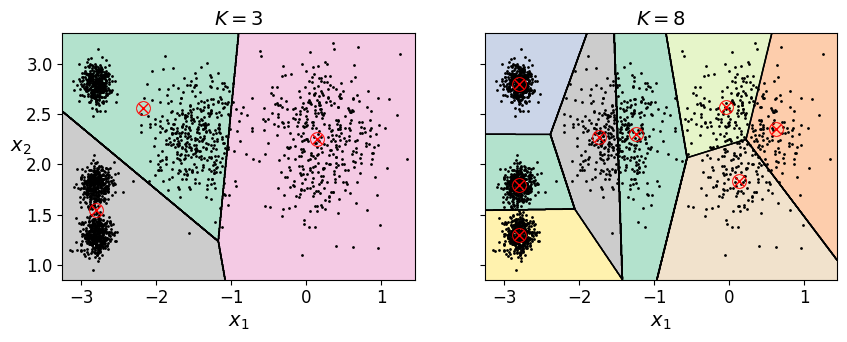

In [53]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$K=3$", "$K=8$")
plt.show()

In [54]:
kmeans_k3.inertia_

653.2167190021553

In [55]:
kmeans_k8.inertia_

119.1198341610288

**Q** Pourquoi le critère d'inertie décroît-il lorsqu'on augmente le nombre de classes ? Que vaut l'inertie dans le cas où K = n (nombre de points) ?

La distance entre les points et leur barycentres décroit nécessairement en augmentant le nombre de classes. Le critère d'inertie suit naturellement ce comportement. Pour k = n l'inertie vaut 0.

Comme le critère d'inertie ne permet pas de choisir (car il décroît avec le nombre de classes), la recherche d'un coude dans cette décroissance peut être une indication d'un nombre minimal de classes.

In [56]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

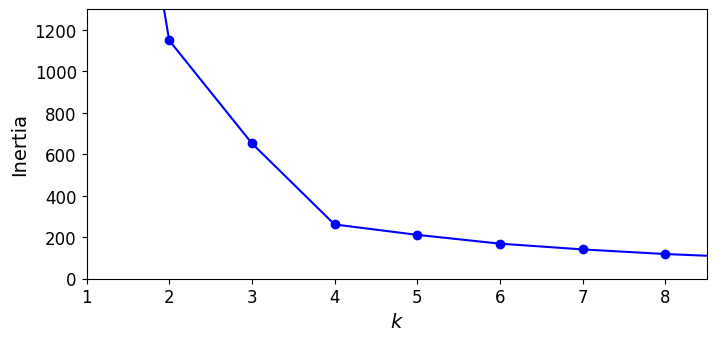

In [57]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, 1300])
plt.show()

Attention, ces données "jouets" sont relativement "faciles" à segmenter en classes. Des données réelles ne conduisent pas à des graphes aussi limpides. Le choix de 4 classes n'est pas mauvais en soit ; la principale difficulté pour segmenter ces données réside dans les dispersions différentes des groupes.

Tracé des silhouettes des classes en fonction de $K$.

**Q** Lire le paragraphe relatif aux silhouettes dans le polycopié et/ou l'aide de la fonction dédiée dans scikit-learn (site : https://scikit-learn.org/). Expliquer le principe.

--> Le coefficient silouette d'un point clusterisé mesure la qualité d'un clustering en comparant les distances moyennes avec les autres points du groupe auquel il appartient avec les points d'autres groupes voisins. Un coefficient silouette négatif indique qu'un point est mal classé.

In [58]:
from sklearn.metrics import silhouette_score

In [59]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [60]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

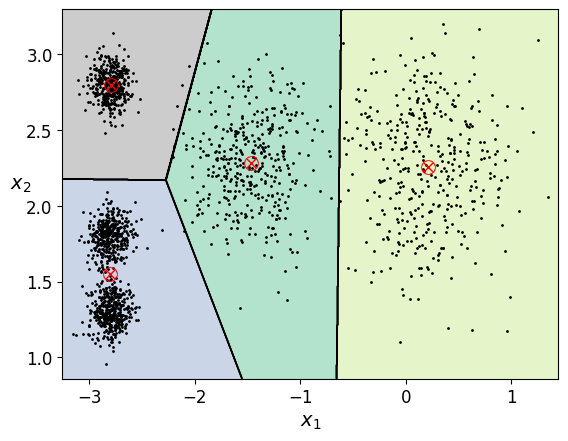

In [61]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

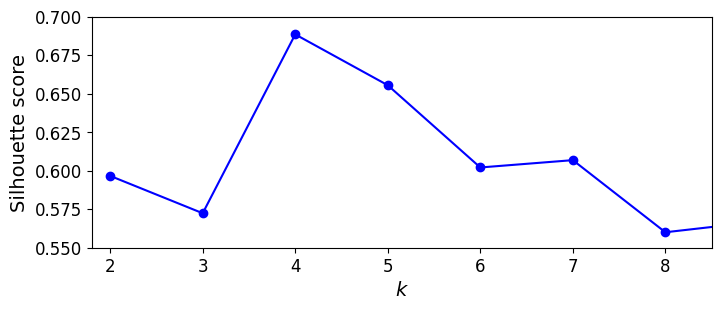

In [62]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

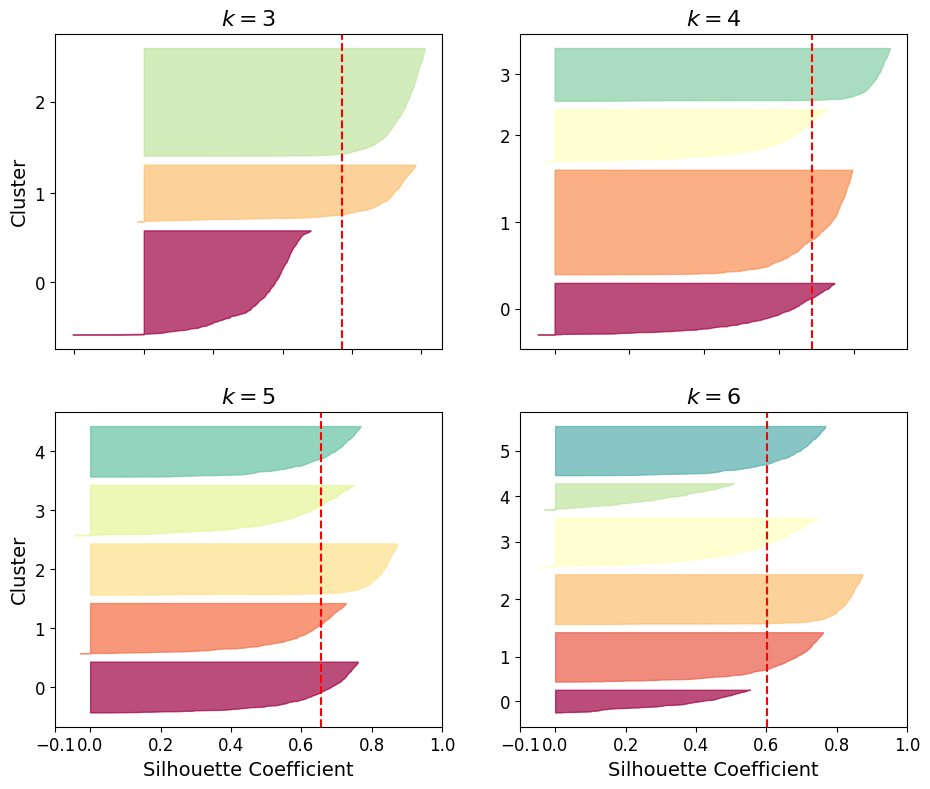

In [63]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        cmap = matplotlib.cm.get_cmap("Spectral")
        color = cmap(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

### 4.7 Limites de *K-means*
Cet algorithme favorise des classes sphériques. Il n'est donc pas adapté à des classes aux formes exotiques ni même elliptiques. Deux classifications sont comparées dont une, bonne, initialisée avec les centres connus.

In [64]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

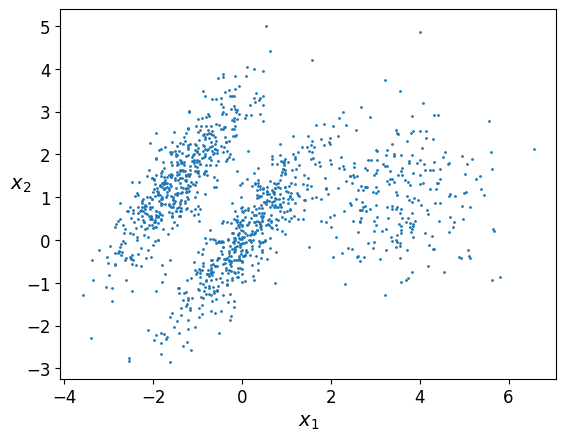

In [65]:
plot_clusters(X)

In [66]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

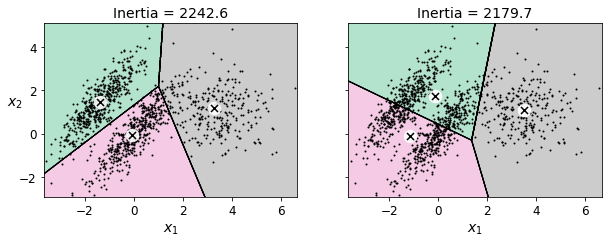

In [43]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)
plt.show()

**Q** Commenter les graphiques ci-dessus ? L'inertie est-elle un bon critère lorsque les nuages n'ont pas la même forme ? Qu'en conclure sur KMeans pour ce type de données ?

Le second clustering semble visuellement moins bon que le premier. Pourtant son inertie est plus faible. Une exécution de l'algorithme avec une recherche de l'inertie la plus faible aurait renvoyé une solution non satisfaisante. L'algorithme de K-means peut donc se tromper lourdement sur des donnés de ce type. 

## 5 DBSCAN
Algorithme plus particulièrement adapté à des classes bien distinctes même si de formes très exotiques. Il marche donc particulièrement bien sur des données synthétiques. Le choix des valeurs des paramètres: `eps, min_samples` de cet algorithme est délicat.

In [67]:
from sklearn.datasets import make_moons

In [68]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [69]:
from sklearn.cluster import DBSCAN

In [70]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [71]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [72]:
len(dbscan.core_sample_indices_)

808

In [73]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [74]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [75]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [76]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [77]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

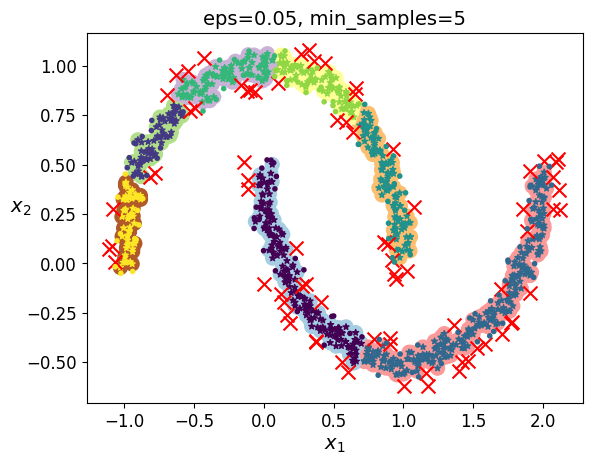

In [78]:
plot_dbscan(dbscan, X, size=100)

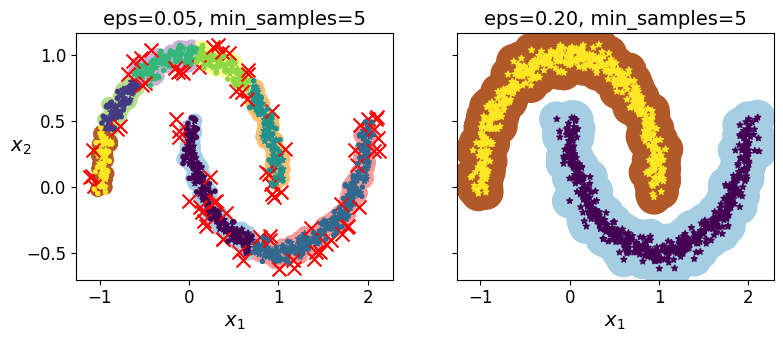

In [79]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.show()

## 6 Mélange gaussien

### 6.1 Iris de Fisher
Exemple typique sur des données classiques.
![Iris](03_iris.png)

In [83]:
from sklearn.datasets import load_iris
# from IPython.display import IFrame
# IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [84]:
data = load_iris()
X_iris = data.data
y_iris = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

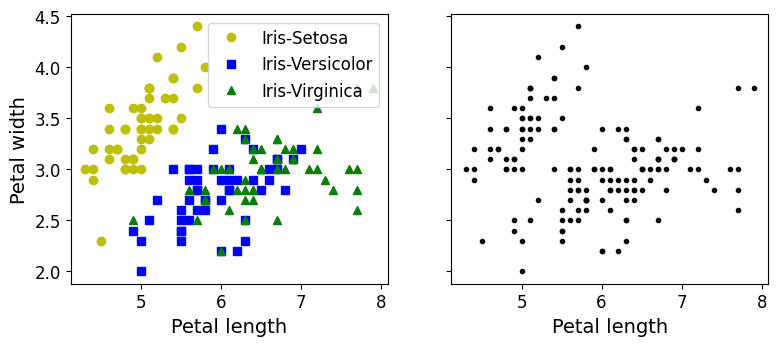

In [85]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X_iris[y_iris==0, 0], X_iris[y_iris==0, 1], "yo", label="Iris-Setosa")
plt.plot(X_iris[y_iris==1, 0], X_iris[y_iris==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X_iris[y_iris==2, 0], X_iris[y_iris==2, 1], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

Un mélange gaussien est bien adapté à ces données.

In [86]:
from sklearn.mixture import GaussianMixture

In [87]:
y_pred_iris = GaussianMixture(n_components=3, random_state=42).fit(X_iris).predict(X_iris)

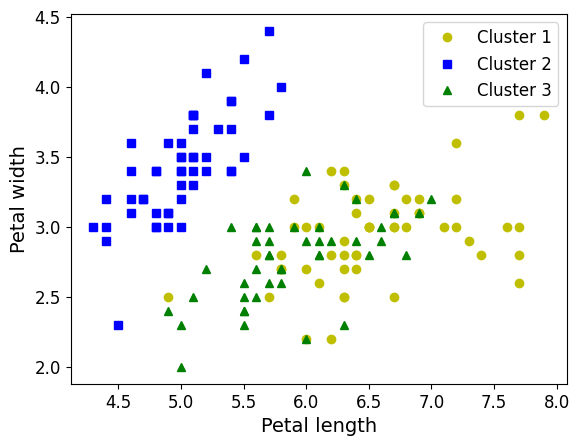

In [88]:
plt.plot(X_iris[y_pred_iris==0, 0], X_iris[y_pred_iris==0, 1], "yo", label="Cluster 1")
plt.plot(X_iris[y_pred_iris==1, 0], X_iris[y_pred_iris==1, 1], "bs", label="Cluster 2")
plt.plot(X_iris[y_pred_iris==2, 0], X_iris[y_pred_iris==2, 1], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

### 6.2 Mélange gaussien des blobs
Cet algorithme est particulièrement adapté aux données précédemment générées.

In [104]:
y_pred_iris==y_iris

y_pred_iris

for i,_ in enumerate(list(y_pred_iris)):
    if y_pred_iris[i]==1:
        y_pred_iris[i] = 0
    elif y_pred_iris[i]==2:
        y_pred_iris[i] = 1
    elif y_pred_iris[i]==0:
        y_pred_iris[i] = 2

In [115]:
np.sum(y_iris==y_pred_iris)

145

In [108]:
np.sum(y_pred_iris==y_iris) / len(y_pred_iris)

0.9666666666666667

In [109]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [110]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

Valeurs des paramètres estimés par l'algorithme.

In [111]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [112]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [113]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

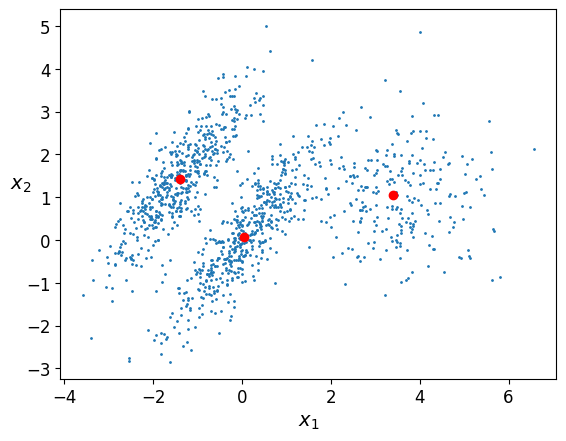

In [114]:
plot_clusters(X)
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c = "r")

**Q** La convergence est elle atteinte? En combien d'iterations ?

In [116]:
gm.converged_

True

In [117]:
gm.n_iter_

4

La fonction `predict()` permet de prédire l'appartenance d'une observation à une classe ou encore avec  `predict_proba()`, la probabilité d'appartenance à chacune des classes.

In [118]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [119]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

De même que pour de nouvelles observations.

In [120]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [121]:
y_new

array([0, 0, 1, 2, 2, 2])

Estimation du logarithme de la fonction de densité en tout point par `score_samples()`

In [122]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

Graphique des frontières des classes et des contours des densités.

In [123]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

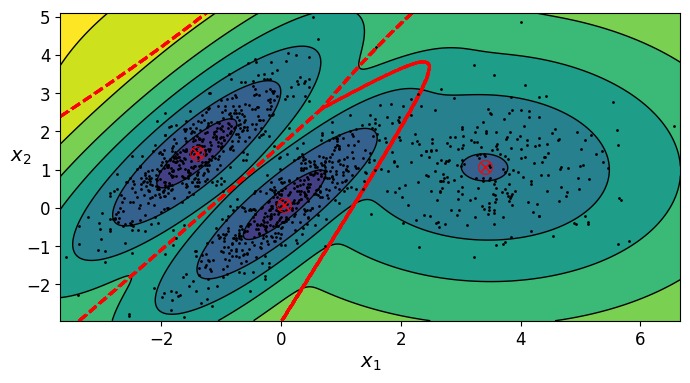

In [124]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

**Q** Commenter le graphique ci-dessus. A quoi correspondent les lignes pointillés rouges ? Comment sont-elles calculées ?

--> Il s'agit des frontières de décision du clustering. Elles sont calculées avec le modèle de Gaussian Mixture.

En vue d'estimer des modèles plus parcimonieux, c'est-à-dire avec moins de paramètres, des contraintes peuvent être imposées aux matrices de covariance en spécifiant le paramètre `covariance_type`:

* `"full"` (defaut) : pas de contrainte sur les matrices de covariance, chaque ellipsoïde peut avoir des formes spécifiques, 
* `"tied"` : même matrices de covariance ou même forme des nuages,
* `"spherical"` : nuages sphériques mais de diamètres différents,
* `"diag"` : nuages ellipsoïdaux parallèles mais de dimensions différentes.

In [125]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [126]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)


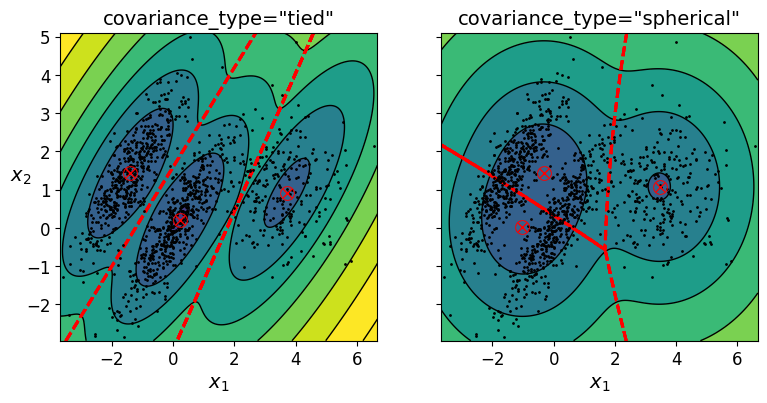

In [127]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.show()

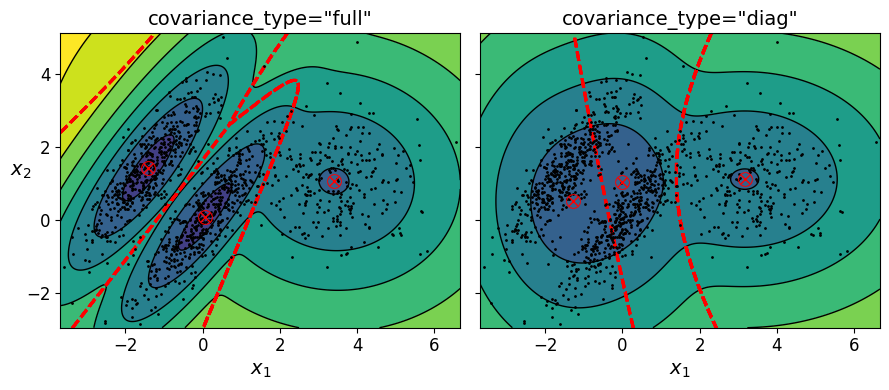

In [128]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

**Q** Comparer ces graphiques, lequel semble le plus adapté à la forme des nuages?

--> Full et tied

### 6.3 Détection d'anomalies

Comme la clasisficaiton ascendante hiérarchique, les mélanges gaussiens peuvent être utilisés pour [détecter des anomalies]() ou observations atypiques c'est-à-dire présentes dans des zones de faible densité. Un paramètre doit être réglé, il définit par exemple le taux d'anomalies à détecter.

In [129]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

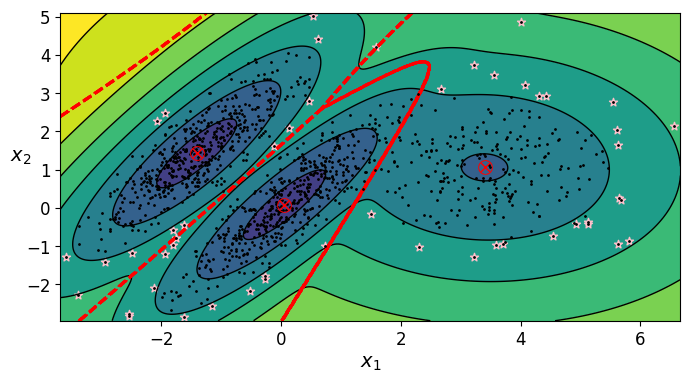

In [132]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='pink', marker='*')
plt.ylim(ymax=5.1)
plt.show()

### 6.4 Sélection de modèle
L'inertie, qui décroît avec le nombre de paramètres du modèle donc de classes, de même que le score de silhouette adapté à des nuages sphériques ne sont pas adaptés à l'optimisation des choix de modèles : nombre de classes et contraintes sur les matrices de covariance. Le modèle de mélange est un modèle statistique usuel estimé par maximum de vraisemblance. La stratégie de sélection de modèle par pénalisation de la vraisemblance du modèle linéaire général peut être utilisée pour le modèle de mélange gaussien. Cette stratégie conduit à la minimisation des critères BIC *(Bayesian Information Criterion)* et AIC *(Akaike Information Criterion)* qui introduisent une pénalisation fonction du nombre de paramètres.

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ est la taille de l'échantillon,
* $p$ est le nombre de paramètres estimés dans le modèle : moyennes, éventuellement les matrices de covariance,
* $\hat L$ la log vraisemblance du modèle minimisée.

Minimiser le BIC ou l'AIC conduit trouver un "meilleur" équilibre entre qualité d'ajustement du modèle (biais) et variance des paramètres.

In [133]:
gm.bic(X)

8189.747000497188

In [134]:
gm.aic(X)

8102.52172038215

Comparons les BIC de modèles de mélange gaussien estimés avec différentes valeurs de $k$ :

In [135]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [136]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

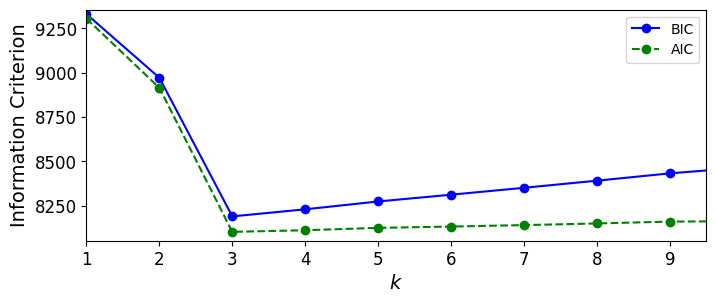

In [137]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.legend()
plt.show()

Chercher le meilleur choix pour le nombre de classes et le `covariance_type`:

In [138]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [139]:
best_k

3

In [140]:
best_covariance_type

'full'